<a href="https://colab.research.google.com/github/YellamatiLakshmi/AD-ASSIGNMENT/blob/main/Day_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
cars = pd.read_csv(file_name)

Saving Cars.csv to Cars.csv


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT',data=cars).fit()

In [ ]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp) # 16.33

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol) # 564.84

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp) # 16.35

# Storing vif values in a data frame
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


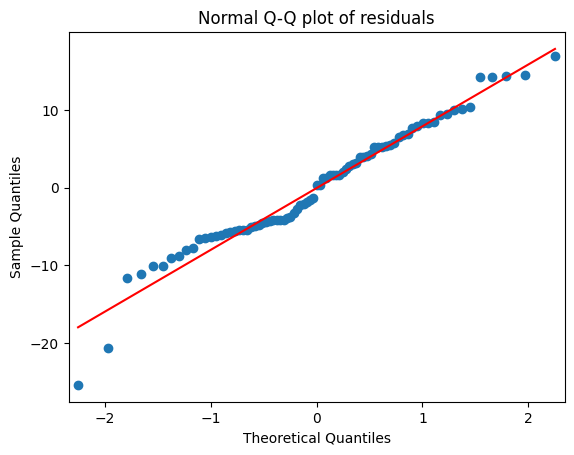

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
import numpy as np
list(np.where( model.resid>10))

[array([ 0,  1,  2,  3,  4,  6, 21, 28])]

# Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()

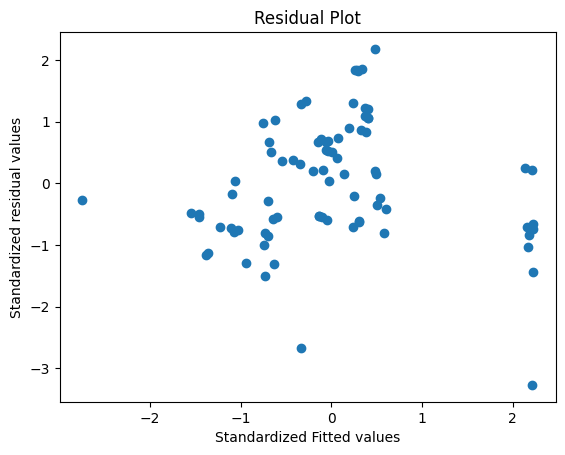

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
model = smf.ols('MPG~WT+SP+VOL',data=cars).fit()

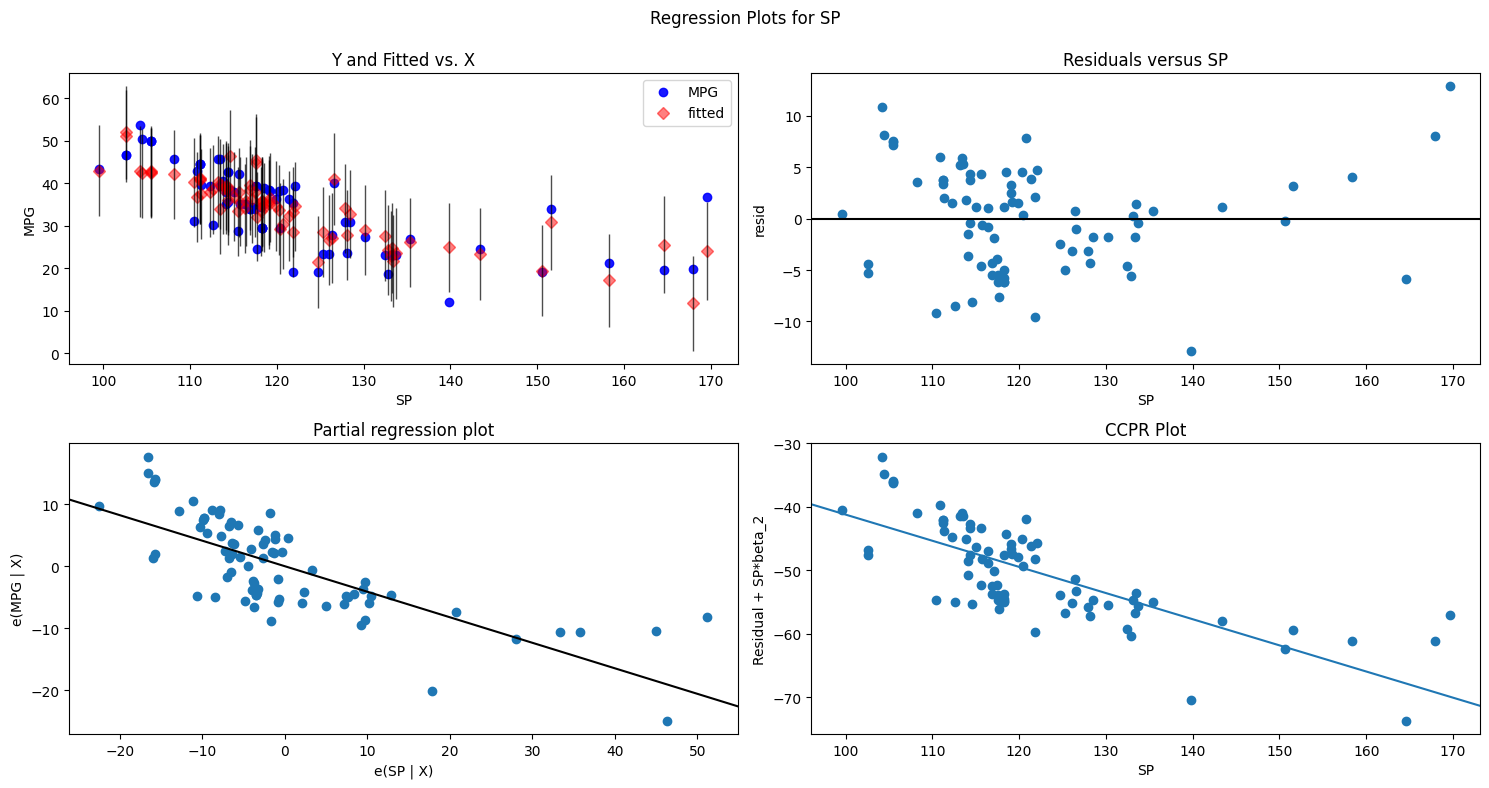

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'SP', fig=fig)
plt.show()

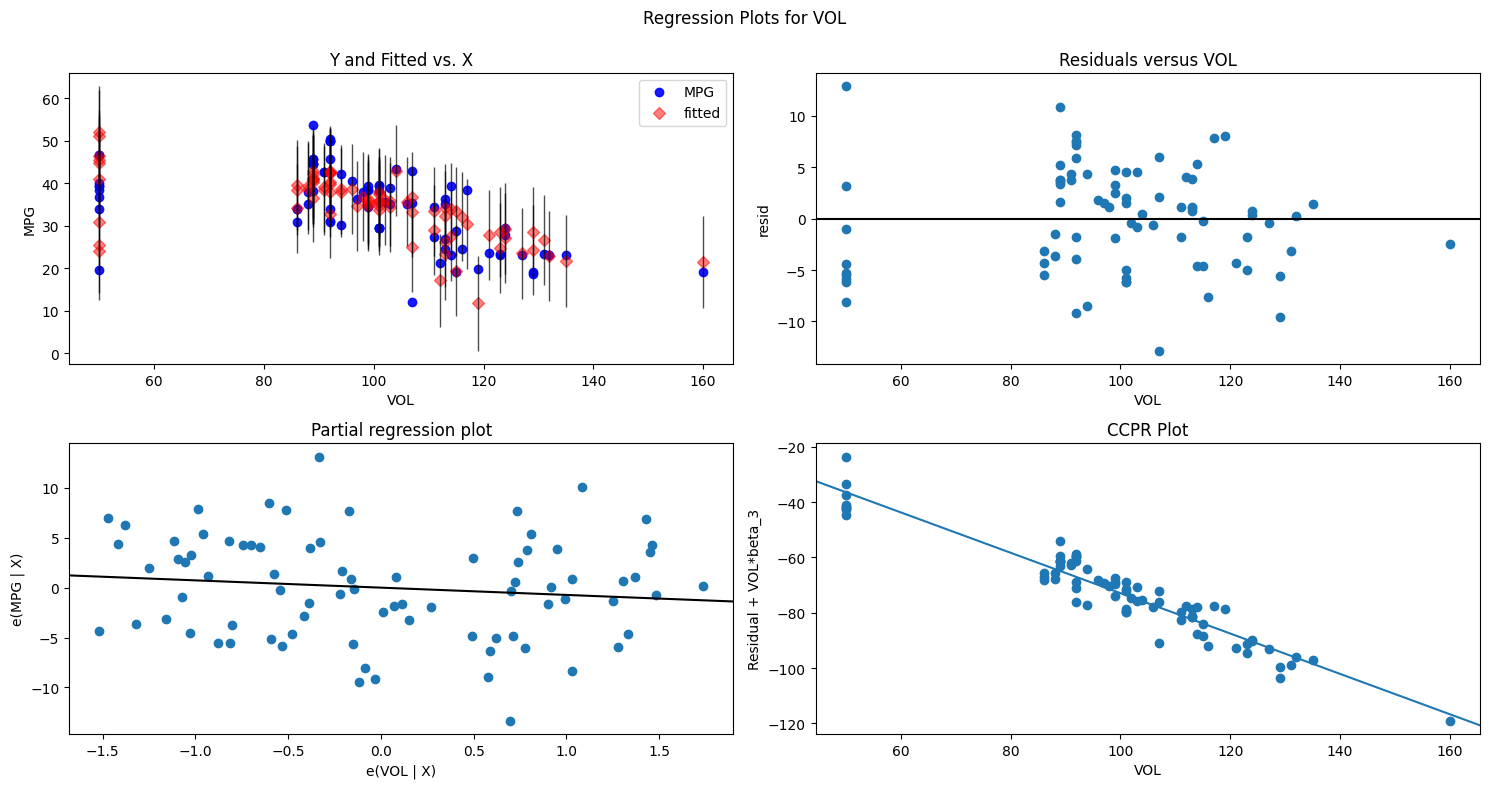

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig=fig)
plt.show()

# Cook's Distance

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

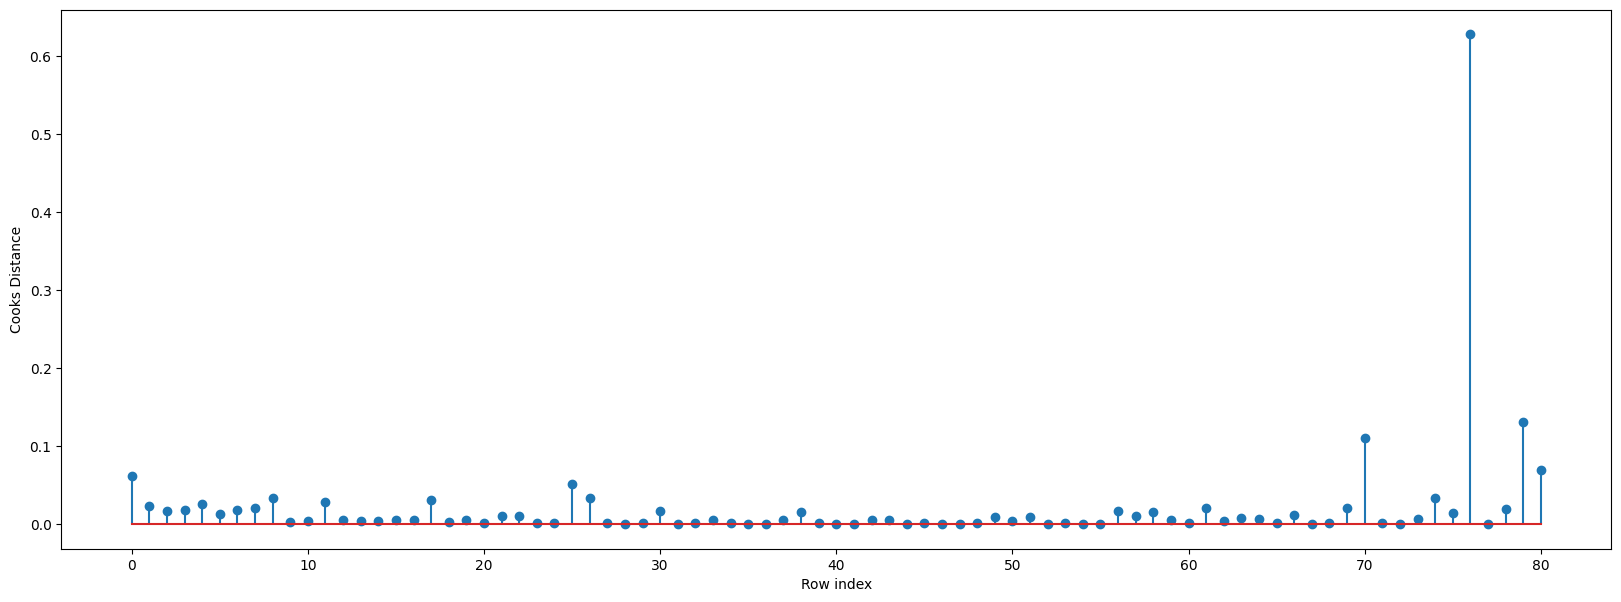

In [ ]:
# plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
cars[cars.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [ ]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
cars = pd.read_csv(file_name)

Saving Cars.csv to Cars (1).csv


In [ ]:
car1 = cars.drop(cars.index[[70,76]],axis=0).reset_index()

In [ ]:
car1 = car1.drop(['index'],  axis=1)